In [46]:
import json
import numpy as np
from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import pandas as pd

rcParams['figure.figsize'] = 8, 8

In [53]:

dirPath = '../experiments/ResNet34_2d/results/'
epochs = 32


mapping = json.load(open('../data/class-mapper.json'))


valgt = [mapping[i['label']] for i in json.load(open('../data/val.json'))]
traingt = [mapping[i['label']] for i in json.load(open('../data/train.json'))]


results = pd.DataFrame(columns=['epoch', 'val_loss', 'train_loss', 
                                'val_acc', 'val_rec', 'val_pre', 'val_f1',
                                'train_acc', 'train_rec', 'train_pre', 'train_f1'])
results_list = []

for epoch in range(epochs+1):
    epName = f"{epoch:04}"
    
  
    valPreds = np.loadtxt(os.path.join(dirPath, f'val{epName}.txt')).astype(int)
    trainPreds = np.loadtxt(os.path.join(dirPath, f'test{epName}.txt')).astype(int)
    

    valAcc = accuracy_score(valgt, valPreds)
    valRec = recall_score(valgt, valPreds, average='micro')
    valPre = precision_score(valgt, valPreds, average='micro')
    valF1 = f1_score(valgt, valPreds, average='macro')
    
   
    trainAcc = accuracy_score(traingt, trainPreds)
    trainRec = recall_score(traingt, trainPreds, average='micro')
    trainPre = precision_score(traingt, trainPreds, average='micro')
    trainF1 = f1_score(traingt, trainPreds, average='macro')
    

    valLoss = np.mean(valPreds != valgt)
    trainLoss = np.mean(trainPreds != traingt)
    
    
    results_list.append({
        'epoch': epoch,
        'val_loss': valLoss,
        'train_loss': trainLoss,
        'val_acc': valAcc,
        'val_rec': valRec,
        'val_pre': valPre,
        'val_f1': valF1,
        'train_acc': trainAcc,
        'train_rec': trainRec,
        'train_pre': trainPre,
        'train_f1': trainF1
    })

# Konwersja listy słowników do DataFrame
results = pd.concat([pd.DataFrame([result]) for result in results_list], ignore_index=True)

# Zapis wyników do pliku CSV
results.to_csv(os.path.join(dirPath, 'results_summary.csv'), index=False)   


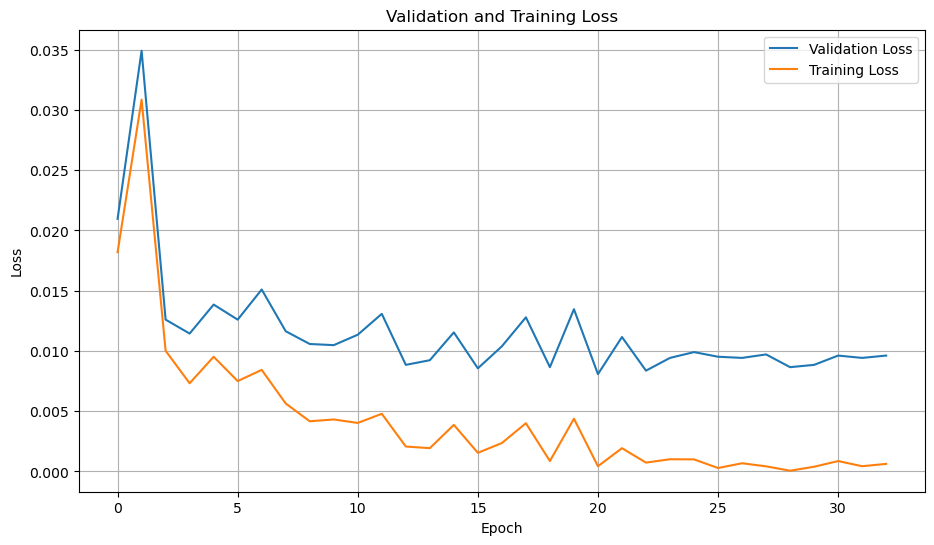

In [56]:
# Tworzenie wykresów
plt.figure(figsize=(24, 6))

# Wykres błędu walidacyjnego i treningowego
plt.subplot(1, 2, 1)
plt.plot(results['epoch'], results['val_loss'], label='Validation Loss')
plt.plot(results['epoch'], results['train_loss'], label='Training Loss')
plt.title('Validation and Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

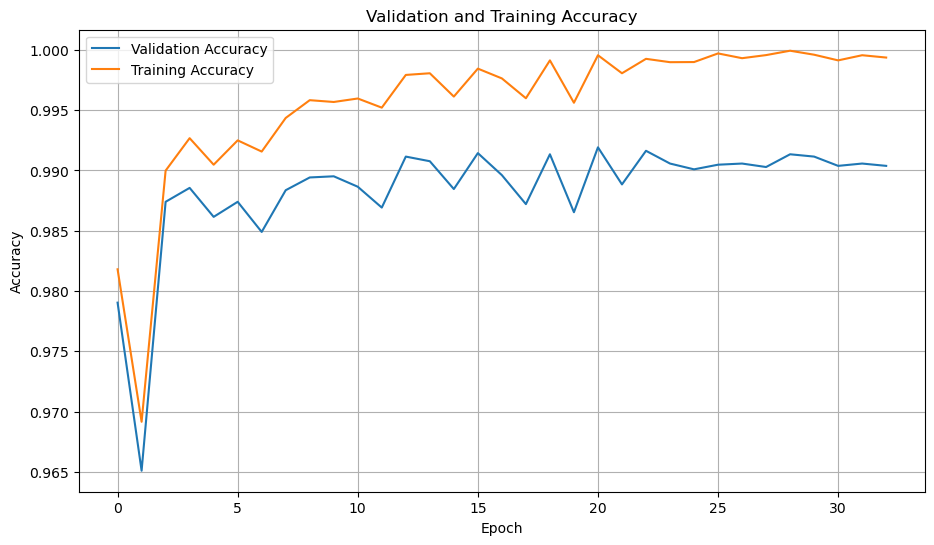

In [57]:
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 2)
plt.plot(results['epoch'], results['val_acc'], label='Validation Accuracy')
plt.plot(results['epoch'], results['train_acc'], label='Training Accuracy')
plt.title('Validation and Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)